## Load sample data


In [1]:
import pandas as pd

data = pd.read_csv("sample_data.csv")
print(data)

      x_parameter                          dataset       competitor    metric
0             0.0  AcousticContaminationMadrid_nmv              dqn  1.270895
1             0.0  AcousticContaminationMadrid_nmv           dqn_sr  4.466003
2             0.0  AcousticContaminationMadrid_nmv    stopping_rule  1.270895
3             0.0  AcousticContaminationMadrid_nmv  proba_threshold  1.270895
4             0.0           AluminiumConcentration              dqn  1.260980
...           ...                              ...              ...       ...
1359          1.0                              UMD  proba_threshold  2.272727
1360          1.0                 WindTurbinePower              dqn  7.425781
1361          1.0                 WindTurbinePower           dqn_sr  6.257812
1362          1.0                 WindTurbinePower    stopping_rule  7.433594
1363          1.0                 WindTurbinePower  proba_threshold  6.257812

[1364 rows x 4 columns]


In [13]:
data.groupby("competitor")["dataset"].apply(len).unique()

array([341])

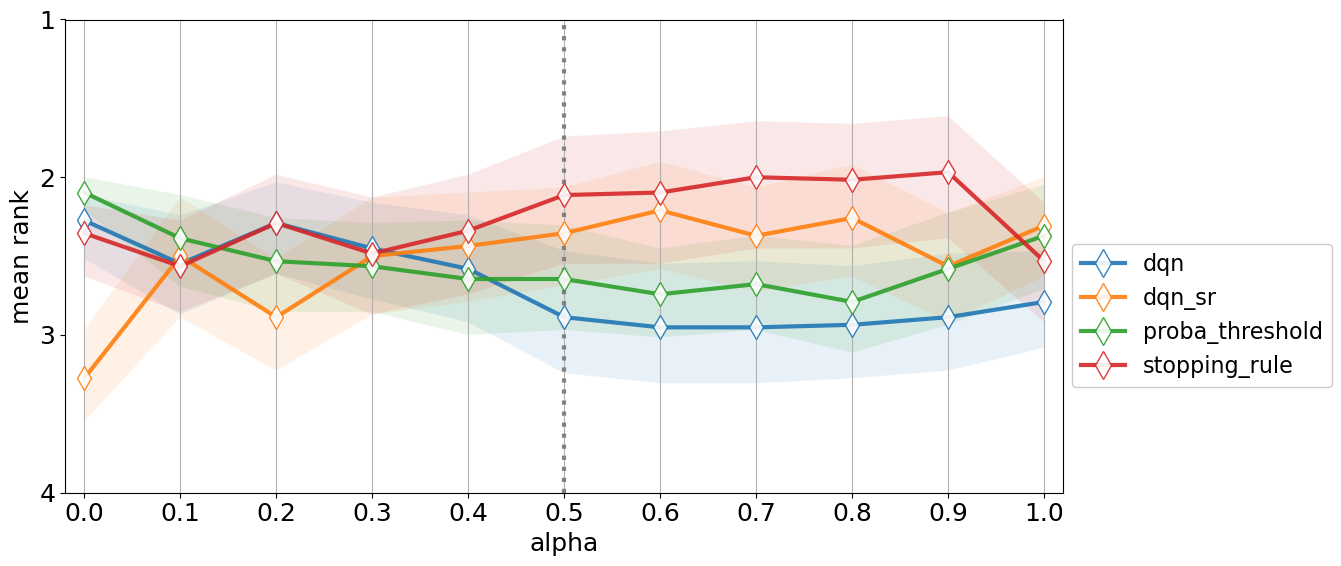

In [6]:
from bump import get_ranks, get_ranks_std , bump_chart
bump_chart(data, xlab="alpha", style_dict=None, confidence_level=0.95)

['dqn' 'dqn_sr' 'stopping_rule' 'proba_threshold']
dqn                 3.0
dqn_sr              8.0
proba_threshold     4.0
stopping_rule      14.0
dtype: float64
dqn                2.935484
proba_threshold    2.790323
dqn_sr             2.258065
stopping_rule      2.016129
dtype: float64
('dqn', 'stopping_rule', 0.00070173479616642, True)
('proba_threshold', 'stopping_rule', 0.0015508617189872226, True)
('dqn_sr', 'proba_threshold', 0.002303742148841711, True)
('dqn', 'dqn_sr', 0.00367870294248937, True)
('dqn_sr', 'stopping_rule', 0.14060599450021982, False)
('dqn', 'proba_threshold', 0.5240983775972055, False)


/Users/aurelienrenault/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


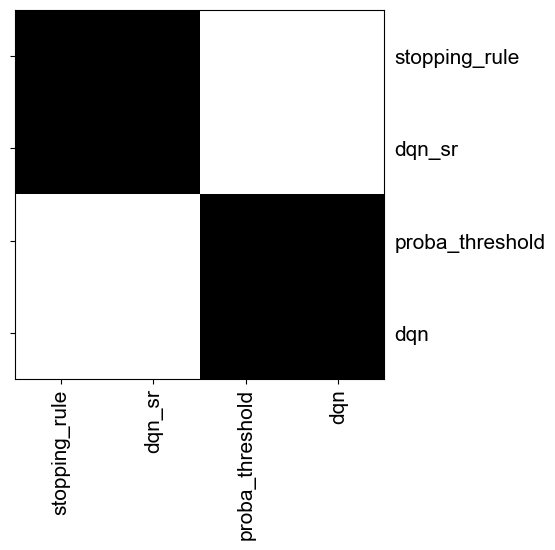

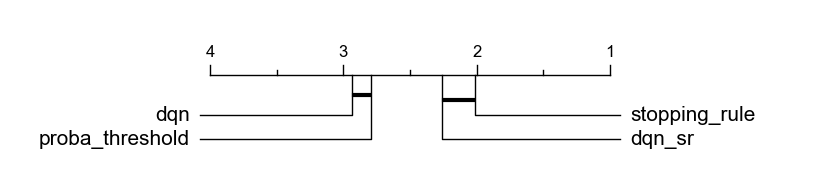

In [27]:
from wilco_holm import draw_cd_diagram
draw_cd_diagram(data[data['x_parameter'] == 0.8], 'metric', 'competitor', ascending=True, pairwise_matrix='corrected', mode='wilco_holm')